In [2]:
# import required libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

from pandas import set_option
#set_option('precision',5)
pd.options.display.float_format = '{:.5f}'.format


from nltk.sentiment.vader import SentimentIntensityAnalyzer as  SIA
import nltk
import seaborn as sns
from IPython import display

In [91]:
# read file

data = pd.read_csv("india-news-headlines.csv",index_col='publish_date',parse_dates=True,infer_datetime_format=True)

In [92]:
data.head()

,headline_category,headline_text
publish_date,,
2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2001-01-02,unknown,America's unwanted heading for India?
2001-01-02,unknown,For bigwigs; it is destination Goa


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297172 entries, 2001-01-01 to 2020-06-30
Data columns (total 2 columns):
headline_category    object
headline_text        object
dtypes: object(2)
memory usage: 75.5+ MB


In [101]:
# take only headlines for recent year
data = data[data.index.year == 2020]

In [103]:
data.head()

,headline_category,headline_text
publish_date,,
2020-01-01,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; M...
2020-01-01,city.bhubaneswar,Bone-chilling cold wavecontinues to sweep state
2020-01-01,city.hyderabad,T gained 163 sq km forest cover
2020-01-01,city.hyderabad,Draft electoral rolls published
2020-01-01,city.kochi,Invasive species increasing in Kerala's core f...


In [104]:
pd.Series(np.unique(data['headline_category']))

0                     astrology.horoscope
1                              auto.bikes
2                               auto.cars
3                           auto.launches
4                      auto.miscellaneous
                      ...                
251                      world.south-asia
252                              world.uk
253                              world.us
254                 world.us.us-and-world
255    world.us.us-presidential-elections
Length: 256, dtype: object

In [105]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [106]:
sns.set(style='darkgrid',context='talk',palette='Dark2')

In [107]:
# calculate sentiment scores using nltk inbuild library SentimentIntensityAnalyzer

sia = SIA()
results = []
for line in data['headline_text']:
    scores = sia.polarity_scores(line)
    scores['headline'] = line
    results.append(scores)
                 
df = pd.DataFrame.from_records(results)

In [108]:
# gave us the scores the whether the headline is positive or negative

df.head(20)

,neg,neu,pos,compound,headline
0,0.00000,0.57600,0.42400,0.79640,Happy New Year 2020: Images; Quotes; Wishes; M...
1,0.00000,1.00000,0.00000,0.00000,Bone-chilling cold wavecontinues to sweep state
2,0.00000,0.65800,0.34200,0.38180,T gained 163 sq km forest cover
3,0.00000,1.00000,0.00000,0.00000,Draft electoral rolls published
4,0.00000,1.00000,0.00000,0.00000,Invasive species increasing in Kerala's core f...
5,0.00000,1.00000,0.00000,0.00000,Onion price in Hyd dips to Rs 90/kg
6,0.43700,0.56300,0.00000,-0.47670,Bizman held for fake plaint
7,0.00000,1.00000,0.00000,0.00000,Highest in three years: 28;000 visit Vandalur ...
8,0.75600,0.24400,0.00000,-0.47670,Sub-registrar suspended
9,0.00000,1.00000,0.00000,0.00000,EDM deaths: Goencho Avaaz slams Sawant


In [109]:
# assigning labels as positive as 1, nehative as -1, and for neutral as 0

df['label'] = 0 
df.loc[df['compound'] > 0.1, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1

In [110]:
df.head()

,neg,neu,pos,compound,headline,label
0,0.00000,0.57600,0.42400,0.79640,Happy New Year 2020: Images; Quotes; Wishes; M...,1
1,0.00000,1.00000,0.00000,0.00000,Bone-chilling cold wavecontinues to sweep state,0
2,0.00000,0.65800,0.34200,0.38180,T gained 163 sq km forest cover,1
3,0.00000,1.00000,0.00000,0.00000,Draft electoral rolls published,0
4,0.00000,1.00000,0.00000,0.00000,Invasive species increasing in Kerala's core f...,0


In [111]:
print("Positive headlines:\n")
print(list(df[df['label']==1].headline)[:5])
print()

print("Negative headlines:\n")
print(list(df[df['label']==-1].headline)[:5])
print()

print("Neutral headlines:\n")
print(list(df[df['label']==0].headline)[:5])

Positive headlines:

['Happy New Year 2020: Images; Quotes; Wishes; Messages; Cards; Greetings; Pictures; GIFs and Wallpapers', 'T gained 163 sq km forest cover', 'Congress; GFP call for special investigation team', 'post new year party detox have these detox teas to cleanse your body', 'Shivin Narang injures his hand on the set of his show']

Negative headlines:

['Bizman held for fake plaint', 'Sub-registrar suspended', "Are you suffering from that 'January 1 morning-after' heel pain?", "Don't allow NPR in Bihar: Tejashwi Prasad Yadav", 'Cop crushed to death by liquor-laden SUV in Bihar']

Neutral headlines:

['Bone-chilling cold wavecontinues to sweep state', 'Draft electoral rolls published', "Invasive species increasing in Kerala's core forest areas", 'Onion price in Hyd dips to Rs 90/kg', 'Highest in three years: 28;000 visit Vandalur zoo on Sunday']


In [112]:
# print the  percentage of the positive and negative sentiments/headlnes

print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100)

 0    43694
-1    29112
 1    18079
Name: label, dtype: int64
 0   48.07614
-1   32.03169
 1   19.89217
Name: label, dtype: float64


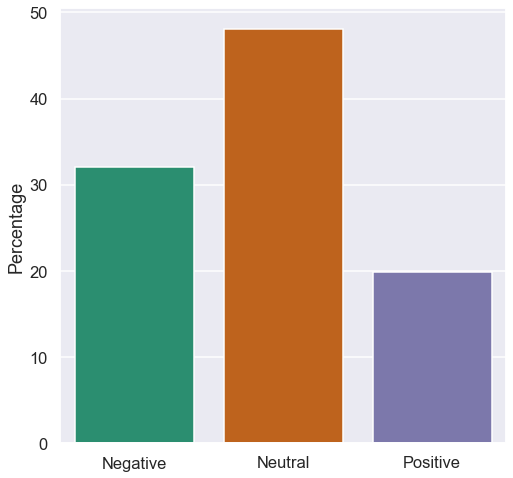

In [113]:
# plot graphs

fig, ax = plt.subplots(figsize = (8,8))

counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y = counts, ax = ax)
ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")
plt.show()

In [114]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation

In [115]:
ps = nltk.PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

In [116]:
# preprocessing the data i.e. converting into a tokens
def process_data(headlines):
    tokens = []
    for line in headlines:
        text = "".join([word.lower() for word in line if word not in punctuation])
        toks = tokenizer.tokenize(text)
        toks = [ps.stem(word) for word in toks if word not in stop_words]#ps.stem(word)
        tokens.extend(toks)
    return tokens

In [118]:
# creating frequecy of words for positive labels

pos_lines = list(df[df.label ==1].headline)
pos_tokens = process_data(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(10)

[('posit', 1547),
 ('test', 1270),
 ('covid19', 1115),
 ('help', 1006),
 ('case', 876),
 ('rs', 697),
 ('get', 694),
 ('lockdown', 663),
 ('say', 573),
 ('delhi', 533)]

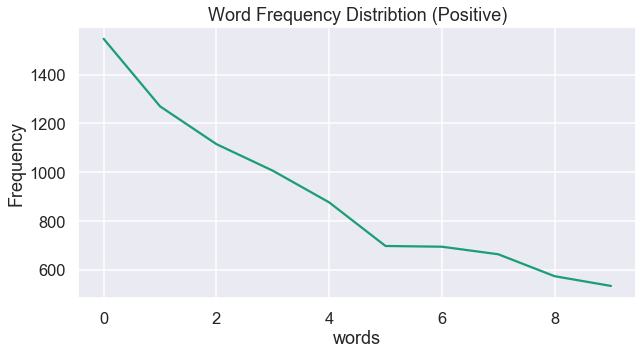

In [119]:
y_val = [x[1] for x in pos_freq.most_common(10)]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribtion (Positive)")
plt.show()

In [121]:
# creating frequecy of words for Negative labels

pos_lines = list(df[df.label ==-1].headline)
pos_tokens = process_data(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(10)

[('man', 1676),
 ('kill', 1437),
 ('covid19', 1405),
 ('arrest', 1364),
 ('case', 1187),
 ('death', 1175),
 ('cop', 1148),
 ('coronaviru', 1138),
 ('two', 1073),
 ('rs', 1049)]

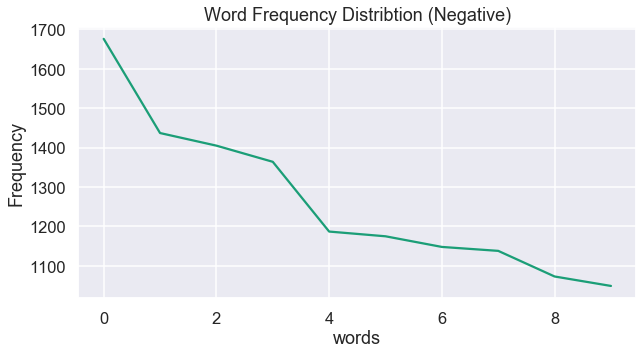

In [122]:
# plot grph

y_val = [x[1] for x in pos_freq.most_common(10)]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribtion (Negative)")
plt.show()

In [123]:
#df['Date'] = data.index

In [125]:
df.index = data.index

In [126]:
df.head()

,neg,neu,pos,compound,headline,label,Date
publish_date,,,,,,,
2020-01-01,0.00000,0.57600,0.42400,0.79640,Happy New Year 2020: Images; Quotes; Wishes; M...,1,2020-01-01
2020-01-01,0.00000,1.00000,0.00000,0.00000,Bone-chilling cold wavecontinues to sweep state,0,2020-01-01
2020-01-01,0.00000,0.65800,0.34200,0.38180,T gained 163 sq km forest cover,1,2020-01-01
2020-01-01,0.00000,1.00000,0.00000,0.00000,Draft electoral rolls published,0,2020-01-01
2020-01-01,0.00000,1.00000,0.00000,0.00000,Invasive species increasing in Kerala's core f...,0,2020-01-01


In [131]:
dataset = df[['compound','Date']]

In [132]:
dataset['headline_category'] = data['headline_category']

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
dataset

,compound,Date,headline_category
publish_date,,,
2020-01-01,0.79640,2020-01-01,life-style.events
2020-01-01,0.00000,2020-01-01,city.bhubaneswar
2020-01-01,0.38180,2020-01-01,city.hyderabad
2020-01-01,0.00000,2020-01-01,city.hyderabad
2020-01-01,0.00000,2020-01-01,city.kochi
...,...,...,...
2020-06-30,0.00000,2020-06-30,gadgets-news
2020-06-30,0.00000,2020-06-30,entertainment.hindi.bollywood
2020-06-30,0.29600,2020-06-30,entertainment.hindi.bollywood


In [135]:
mean_df = dataset.groupby(['headline_category','Date']).mean()

In [140]:
mean_df

compound
headline_category                  Date                
astrology.horoscope                2020-01-02  -0.65970
                                   2020-01-03  -0.65970
                                   2020-01-06   0.00000
                                   2020-01-15   0.00000
                                   2020-01-16  -0.65970
...                                                 ...
world.us.us-and-world              2020-05-23  -0.54230
world.us.us-presidential-elections 2020-02-23   0.58590
                                   2020-02-24   0.58590
                                   2020-03-11   0.57190
                                   2020-05-02  -0.58590

[12160 rows x 1 columns]

In [141]:
mean_df = mean_df.unstack()
mean_df

compound                        \
Date                               2020-01-01 2020-01-02 2020-01-03   
headline_category                                                     
astrology.horoscope                       nan   -0.65970   -0.65970   
auto.bikes                                nan        nan        nan   
auto.cars                                 nan    0.47670        nan   
auto.launches                             nan        nan        nan   
auto.miscellaneous                   -0.22630    0.00000        nan   
...                                       ...        ...        ...   
world.south-asia                          nan        nan    0.00000   
world.uk                                  nan        nan        nan   
world.us                                  nan        nan   -0.32985   
world.us.us-and-world                     nan        nan        nan   
world.us.us-presidential-elections        nan        nan        nan   

                                                                     \
Date                               2020-01-04 2020-01-05 2020-01-06   
headline_category                                                     
astrology.horoscope                       nan        nan    0.00000   
auto.bikes                                nan        nan        nan   
auto.cars                                 nan        nan        nan   
auto.launches                             nan        nan        nan   
auto.miscellaneous                    0.13230    0.00000    0.20230   
...                                       ...        ...        ...   
world.south-asia                          nan        nan   -0.34000   
world.uk                                  nan        nan        nan   
world.us                                  nan    0.36120        nan   
world.us.us-and-world                     nan        nan        nan   
world.us.us-presidential-elections        nan        nan        nan   

                                                                     \
Date                               2020-01-07 2020-01-08 2020-01-09   
headline_category                                                     
astrology.horoscope                       nan        nan        nan   
auto.bikes                                nan        nan        nan   
auto.cars                                 nan        nan        nan   
auto.launches                             nan        nan        nan   
auto.miscellaneous                   -0.42150   -0.14970        nan   
...                                       ...        ...        ...   
world.south-asia                          nan        nan        nan   
world.uk                                  nan        nan        nan   
world.us                                  nan    0.34000        nan   
world.us.us-and-world                     nan        nan        nan   
world.us.us-presidential-elections        nan        nan        nan   

                                               ...                        \
Date                               2020-01-10  ... 2020-06-21 2020-06-22   
headline_category                              ...                         
astrology.horoscope                       nan  ...        nan        nan   
auto.bikes                                nan  ...        nan        nan   
auto.cars                                 nan  ...        nan        nan   
auto.launches                             nan  ...        nan        nan   
auto.miscellaneous                    0.00000  ...        nan        nan   
...                                       ...  ...        ...        ...   
world.south-asia                          nan  ...        nan        nan   
world.uk                                  nan  ...   -0.74140        nan   
world.us                                  nan  ...   -0.31820        nan   
world.us.us-and-world                     nan  ...        nan        nan   
world.us.us-presidential-elections        nan  ...        nan   

In [142]:
mean_df = mean_df.xs('compound',axis = 'columns').transpose()
mean_df

headline_category,astrology.horoscope,auto.bikes,auto.cars,auto.launches,auto.miscellaneous,auto.reviews,business,business.india-business,business.international-business,citizen.stories,...,world.europe,world.mad-mad-world,world.middle-east,world.pakistan,world.rest-of-world,world.south-asia,world.uk,world.us,world.us.us-and-world,world.us.us-presidential-elections
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,nan,nan,nan,nan,-0.22630,nan,nan,-0.07741,nan,-0.19412,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-01-02,-0.65970,nan,0.47670,nan,0.00000,nan,nan,-0.02501,nan,-0.06035,...,nan,nan,nan,0.00000,nan,nan,nan,nan,nan,nan
2020-01-03,-0.65970,nan,nan,nan,nan,nan,0.00000,0.10326,nan,-0.20847,...,nan,nan,nan,-0.76500,nan,0.00000,nan,-0.32985,nan,nan
2020-01-04,nan,nan,nan,nan,0.13230,0.00000,nan,-0.07467,nan,nan,...,nan,nan,nan,0.00000,nan,nan,nan,nan,nan,nan
2020-01-05,nan,nan,nan,nan,0.00000,nan,nan,0.13660,nan,-0.11545,...,nan,nan,-0.76500,-0.77830,nan,nan,nan,0.36120,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,nan,nan,nan,nan,nan,nan,nan,-0.05976,nan,nan,...,nan,nan,nan,-0.52670,nan,nan,nan,nan,nan,nan
2020-06-27,-0.65970,nan,nan,nan,nan,nan,nan,-0.04548,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-06-28,0.00000,nan,nan,nan,nan,nan,nan,0.17000,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


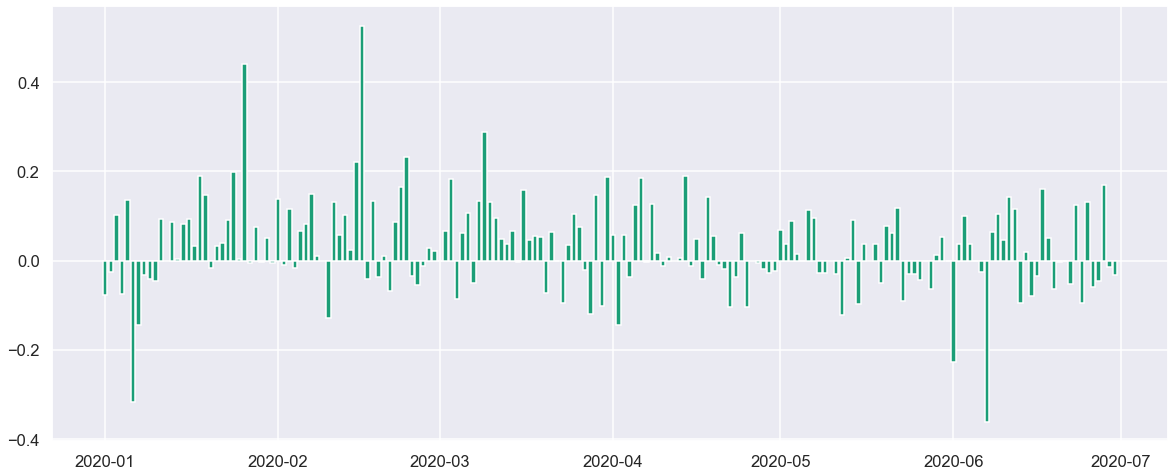

In [148]:
fig = plt.figure(figsize=(20,8))
plt.bar(mean_df.index,mean_df['business.india-business'])
plt.show()